# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [8]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
# Your code here:
print(sensor.shape)
sensor.dropna(how='any', inplace=True)
print(sensor.shape)

(1751, 12)
(1751, 12)


How many rows and columns are in our data?

In [4]:
# Your code here:
#1751 row and 12 columns


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [22]:
# Your code here:
dr = pd.date_range(start='2018-01-01 00:00:00',end='2018-01-01 00:29:10', periods=len(sensor))
print(dr)
#occupancy.date = pd.to_datetime(occupancy.date)

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)


Assign the time series index to the dataframe's index.

In [24]:
# Your code here:
sensor.index = pd.DatetimeIndex(dr)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

/home/must4in3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


Figure(432x288)


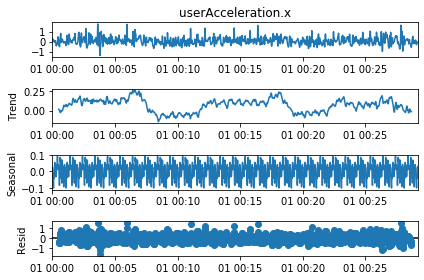

In [27]:
# Your code here:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
print(res.plot())


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

/home/must4in3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


Figure(432x288)


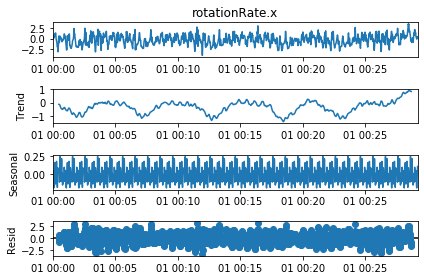

In [28]:
res2 = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)
print(res2.plot())

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

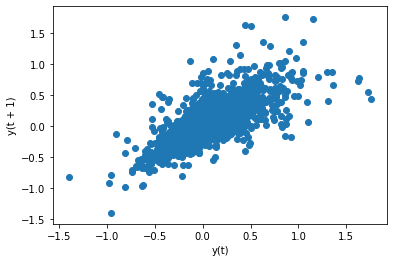

In [29]:
# Your code here:
import matplotlib.pyplot as plt
plt.figure()
pd.plotting.lag_plot(sensor['userAcceleration.x'])

Create a lag plot for `rotationRate.x`

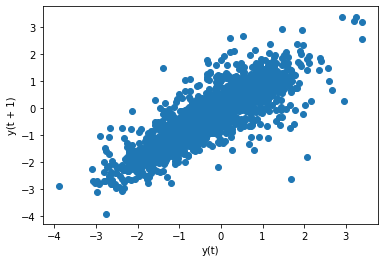

In [30]:
# Your code here:
plt.figure()
pd.plotting.lag_plot(sensor['rotationRate.x'])


What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:
# hay una autocorrelation


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

2018-01-01 00:00:00    0.294894
2018-01-01 00:00:01    0.219405
2018-01-01 00:00:02    0.010714
2018-01-01 00:00:03   -0.008389
2018-01-01 00:00:04    0.199441
                         ...   
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Name: userAcceleration.x, Length: 1751, dtype: float64 Stationary


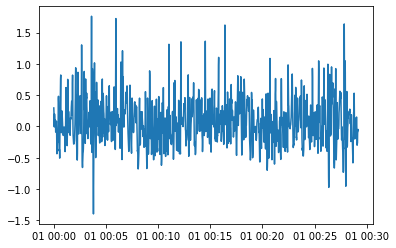

In [34]:
# Your code here:
from statsmodels.tsa.stattools import adfuller
stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

q = sensor._get_numeric_data()
print(sensor['userAcceleration.x'],stationaryCheck(sensor['userAcceleration.x']))
plt.plot(sensor['userAcceleration.x'])

2018-01-01 00:00:00    0.316738
2018-01-01 00:00:01    0.842032
2018-01-01 00:00:02   -0.138143
2018-01-01 00:00:03   -0.025005
2018-01-01 00:00:04    0.114253
                         ...   
2018-01-01 00:29:06   -0.123211
2018-01-01 00:29:07   -0.057641
2018-01-01 00:29:08    0.343238
2018-01-01 00:29:09    0.470144
2018-01-01 00:29:10    0.291873
Name: rotationRate.x, Length: 1751, dtype: float64 Stationary


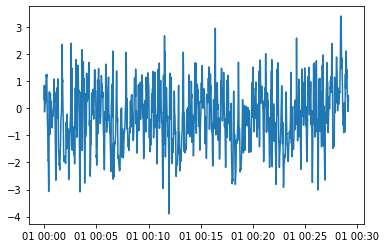

In [35]:
print(sensor['rotationRate.x'],stationaryCheck(sensor['rotationRate.x']))
plt.plot(sensor['rotationRate.x'])

What are your conclusions from this test?

In [36]:
# Your conclusions here:
#Las observaciones en una serie de tiempo estacionaria no dependen del tiempo.
#Las series de tiempo son estacionarias si no tienen tendencia o efectos estacionales. 
#Las estadísticas de resumen calculadas en las series temporales son consistentes en el tiempo, como la media 
#o la varianza de las observaciones.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [45]:
# Your code here:
train = sensor['userAcceleration.x'][:-10]
test = sensor['userAcceleration.x'][-10:]

from statsmodels.tsa.arima_model import ARMA

# Entrena el modelo AR
model = ARMA(train, order=(2,1))
print(f"Entrenando con los datos desde la serie userAcceleration.x")
model_fit = model.fit(maxlag=10)

/home/must4in3/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie userAcceleration.x


In [67]:
     # Predice los valores ARIMA
    #https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
predictions = dict()
predictions['userAcceleration.x_predict'] = model_fit.predict(start=len(train),
                                     end=len(train)+len(test)-1, dynamic=False)

In [68]:
pred = pd.DataFrame(predictions)
pred

,userAcceleration.x_predict
2018-01-01 00:29:01,0.173149
2018-01-01 00:29:02,0.142896
2018-01-01 00:29:03,0.100522
2018-01-01 00:29:04,0.070106
2018-01-01 00:29:05,0.056099
2018-01-01 00:29:06,0.053778
2018-01-01 00:29:07,0.056790
2018-01-01 00:29:08,0.060646
2018-01-01 00:29:09,0.063316
2018-01-01 00:29:10,0.064493


In [69]:
pred = pd.concat([pred, test], axis=1)
pred

,userAcceleration.x_predict,userAcceleration.x
2018-01-01 00:29:01,0.173149,0.149749
2018-01-01 00:29:02,0.142896,0.038461
2018-01-01 00:29:03,0.100522,-0.169175
2018-01-01 00:29:04,0.070106,-0.300361
2018-01-01 00:29:05,0.056099,-0.270174
2018-01-01 00:29:06,0.053778,-0.268367
2018-01-01 00:29:07,0.056790,-0.102444
2018-01-01 00:29:08,0.060646,-0.085590
2018-01-01 00:29:09,0.063316,-0.048105
2018-01-01 00:29:10,0.064493,-0.065011


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [72]:
from statsmodels.tools.eval_measures import rmse


In [73]:
# Your code here:
rmse = rmse(pred['userAcceleration.x'], pred['userAcceleration.x_predict']) 


In [74]:
print(rmse)

0.22529863630399052
